## Get dataset using Kaggle API

### Import libraries 

In [1]:
import pandas as pd
import numpy as np

# tool to read data csv file (it is faster than pandas and can read files from .zip)
import datatable as dt

import matplotlib.pyplot as plt
import seaborn as sns

# Alias for set_theme(), which is the preferred interface
sns.set()

import plotly.express as px

from wordcloud import WordCloud, STOPWORDS

# colored output text
from termcolor import colored
import re

# display and store Matplotlib plots within a Python Jupyter notebook (no need to use .show())
%matplotlib inline

### Install kaggle library

In [2]:
# !pip install kaggle

### Add credentials used for Kaggle API

In [3]:
# # try in bash (if not working in Jupyter) create folder .kaggle and copy kaggle.json (kaggle api key) to it
# !mkdir ~/.kaggle
# !cp ~/Downloads/kaggle.json ~/.kaggle/kaggle.json

### Search for datasets

In [4]:
# search for the dataset
# !kaggle datasets list -s 'fake-news'

### Dowload datasets

In [5]:
# # https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv
# !kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# # https://www.kaggle.com/datasets/ruchi798/source-based-news-classification
# !kaggle datasets download -d ruchi798/source-based-news-classification

# # # https://www.kaggle.com/datasets/mrisdal/fake-news
# # !kaggle datasets download -d mrisdal/fake-news

# # # https://www.kaggle.com/datasets/jruvika/fake-news-detection
# # !kaggle datasets download -d jruvika/fake-news-detection

# # # https://www.kaggle.com/datasets/jillanisofttech/fake-or-real-news
# # !kaggle datasets download -d jillanisofttech/fake-or-real-news

# # # https://www.kaggle.com/datasets/corrieaar/disinformation-articles
# # !kaggle datasets download -d corrieaar/disinformation-articles

# # # https://www.kaggle.com/datasets/techykajal/fakereal-news
# # !kaggle datasets download -d techykajal/fakereal-news

### Create folder for datasets
#### Move dataset to data directory

In [6]:
# !mkdir data
# !mv fake-and-real-news-dataset.zip data
# !mv source-based-news-classification.zip data
# # !mv fake-news.zip data
# # !mv fake-news-detection.zip data
# # !mv fake-or-real-news.zip data
# # !mv disinformation-articles.zip data

### Explore Datasets

## fake-and-real-news-dataset
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

## Fake news set

In [7]:
# read data from .csv in .zip folder
fake_df = dt.fread('data/fake-and-real-news-dataset.zip/Fake.csv').to_pandas()
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake_df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17453,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,630,9050,46


In [9]:
fake_df.shape

(23481, 4)

In [10]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### Remove duplicates

In [12]:
# check for duplicates by text
duplicates = fake_df['text'][fake_df['text'].duplicated()].index
text = f'Found {len(duplicates)} duplicates in {fake_df.shape[0]} samples'
print(colored(text, 'blue', attrs=['bold']))

Found 6028 duplicates in 23481 samples


In [13]:
# remove duplicates
fake_df.drop(index=duplicates, inplace=True)
print(fake_df.shape, '\n')
fake_df.sample(3)

(17453, 4) 



,title,text,subject,date
22386,"‘Beyonce, Jay Z, Hillary Clinton – You Don’t R...",21st Century Wire says One of the great myths ...,US_News,"November 11, 2016"
13421,HILARIOUS! #BlackLivesMatter Protest Hillary A...,Pandering Hillary s getting a little karma Bla...,politics,"Jul 26, 2016"
14527,OPEN-BORDER LIBERALS Put Entire Nation On High...,Thank you Angela Merkel German security servic...,politics,"Feb 5, 2016"


##  True news set

In [14]:
true_df = dt.fread('data/fake-and-real-news-dataset.zip/True.csv').to_pandas()
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [15]:
true_df.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20825,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [16]:
true_df.shape

(21417, 4)

In [17]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [18]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### Remove duplicates

In [19]:
# check for duplicates
duplicates = true_df['text'][true_df['text'].duplicated()].index
text = f'Found {len(duplicates)} duplicates in {true_df.shape[0]} samples'
print(colored(text, 'blue', attrs=['bold']))

Found 225 duplicates in 21417 samples


In [20]:
# remove duplicates
true_df.drop(index=duplicates, inplace=True)
print(true_df.shape, '\n')
true_df.sample(3)

(21192, 4) 



,title,text,subject,date
19153,U.N. medics see evidence of rape in Myanmar ar...,"COX S BAZAR, Bangladesh (Reuters) - Doctors tr...",worldnews,"September 24, 2017"
12039,Philippine Congress backs body cameras for pol...,MANILA (Reuters) - The Philippine Congress app...,worldnews,"December 18, 2017"
13453,U.S. says ban-the-bomb Nobel winner won't make...,OSLO (Reuters) - The Nobel Peace Prize winner ...,worldnews,"November 30, 2017"


### Remove source such as Reuters, WASHINGTON, etc.

In [21]:
# # output: ['WASHINGTON (Reuters)']
# # Test pattern search
# test = 'WASHINGTON (Reuters) - The U.S. Treasury'

# pattern = r'[A-Z]* ?\(Reuters\)'
# test2 = re.findall(pattern, test)
# test2

In [22]:
# find how many samples have <CITY> (Reuters) pattern in text
# pattern meaning: zero or more uppercase letters, one or zero spaces, (Reuters)
pattern = r'[A-Z]* ?\(Reuters\)'

test_df = true_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

text = f"{test_df.groupby('patterns')['text'].count()[1]} of {true_df.shape[0]} samples have <CITY> (Reuters) pattern"
print(colored(text, 'blue', attrs=['bold']))

21021 of 21192 samples have <CITY> (Reuters) pattern


In [23]:
# remove pattern <CITY> (Reuters)
true_df['text'] = true_df['text'].map(lambda x: re.sub(pattern, '', x))
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",- The head of a conservative Republican facti...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,- Transgender people will be allowed for the ...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,- The special counsel investigation of links ...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,- Trump campaign adviser George Papadopoulos ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/ - President Donald Trump called on th...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,- NATO allies on Tuesday welcomed President D...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"- LexisNexis, a provider of legal, regulatory...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,- In the shadow of disused Soviet-era factori...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,- Vatican Secretary of State Cardinal Pietro ...,worldnews,"August 22, 2017"


## Add target labels and concatenate two datasets in one

In [24]:
# add labels: add column 'target' where 0 = real, 1 = fake 
fake_df['target'] = 1
true_df['target'] = 0

# check new shape
fake_df.shape, true_df.shape

((17453, 5), (21192, 5))

In [25]:
concat_df = pd.concat([fake_df, true_df], ignore_index=True)
concat_df.head(3)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1


In [26]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38645 entries, 0 to 38644
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38645 non-null  object
 1   text     38645 non-null  object
 2   subject  38645 non-null  object
 3   date     38645 non-null  object
 4   target   38645 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
concat_df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

### Check empty text

In [28]:
# check empty text
concat_df[concat_df['text'].str.strip()=='']

,title,text,subject,date,target
10920,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",1
26373,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",0


In [29]:
concat_df = concat_df[concat_df['text'].str.strip()!='']
concat_df.shape

(38643, 5)

## Plot subject vs target

In [30]:
concat_df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'politicsNews', 'worldnews'], dtype=object)

In [31]:
concat_df.groupby('subject')['target'].count()

subject
Government News      514
News                9050
US_News              783
left-news            683
politics            6422
politicsNews       11213
worldnews           9978
Name: target, dtype: int64

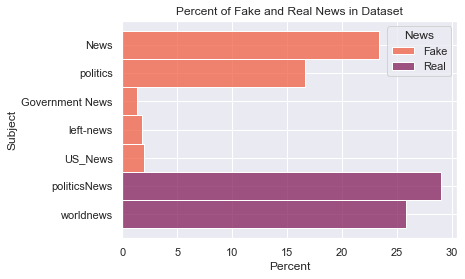

In [32]:
# plot subject using seaborn and matplotlib
sns.histplot(concat_df,  y='subject', hue='target',  stat='percent', multiple='stack', palette='rocket')
plt.ylabel('Subject')
plt.title('Percent of Fake and Real News in Dataset')
plt.legend(title='News', loc='upper right', labels=['Fake', 'Real'])

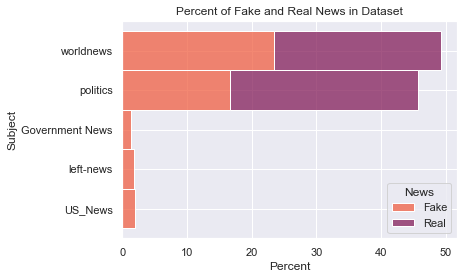

In [33]:
# change politicsNews to politics, News to worldnews and plot again
concat_df['subject'].replace({'politicsNews':'politics', 'News':'worldnews'}, inplace=True)

sns.histplot(concat_df,  y='subject', hue='target',  stat='percent', multiple='stack', palette='rocket')
plt.ylabel('Subject')
plt.title('Percent of Fake and Real News in Dataset')
plt.legend(title='News', loc='lower right', labels=['Fake', 'Real'])

## Expand date into day, month, year

In [34]:
# translate date into datetime format where possible
def extract_day_month_year(date):
    try:
        return pd.to_datetime(date, infer_datetime_format=True)
    except:
        return np.nan
    
concat_df['Date'] = concat_df.apply(lambda row: extract_day_month_year(row['date']), axis = 1)
concat_df.sample(3)

,title,text,subject,date,target,Date
36591,UK PM May says Brexit transition period to las...,"FLORENCE, Italy - Prime Minister Theresa May s...",worldnews,"September 22, 2017",0,2017-09-22
33057,U.N. refugee commissioner says Australia must ...,- The U.N. High Commissioner for Refugees sai...,worldnews,"November 1, 2017",0,2017-11-01
4735,Mural Of Gov. LePage Wearing KKK Garb Has Main...,"The city of Portland, Maine has been thrown in...",worldnews,"September 7, 2016",1,2016-09-07


In [35]:
# check null values
concat_df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
Date       6
dtype: int64

In [36]:
# check samples where date is nan
concat_df[concat_df['Date'].isna()]

,title,text,subject,date,target,Date
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1,NaT
15119,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1,NaT
15120,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1,NaT
15422,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,NaT
15423,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,NaT
16126,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,1,NaT


In [37]:
# drop nan values and check the shape of df
concat_df.dropna(inplace=True)
print(concat_df.shape)
concat_df.sample(5)

(38637, 6)


,title,text,subject,date,target,Date
7459,"Right-Wing Sheriff: We Don’t Need Rape Kits, ...","We definitely live in a rape culture, and one ...",worldnews,"March 16, 2016",1,2016-03-16
3543,Trump’s Potential Pick For Labor Secretary PRO...,"Throughout the campaign, many have tried defen...",worldnews,"December 6, 2016",1,2016-12-06
19322,U.S. appeals court says Texas can implement vo...,- The state of Texas won at least a temporary...,politics,"September 6, 2017",0,2017-09-06
34672,Austrian conservative leader sees many options...,- Austrian conservative leader Sebastian Kurz...,worldnews,"October 15, 2017",0,2017-10-15
20164,Threatening note left at senator's office amid...,- A threatening note was left over the weeken...,politics,"July 17, 2017",0,2017-07-17


In [38]:
# add columns for day, month, year
concat_df['day'] = concat_df.apply(lambda row: row['Date'].day, axis = 1)
concat_df['month'] = concat_df.apply(lambda row: row['Date'].month, axis = 1)
concat_df['year'] = concat_df.apply(lambda row: row['Date'].year, axis = 1)

# drop redundant date, Date columns
concat_df.drop(['date', 'Date'], axis=1, inplace=True)
concat_df.sample(3)

,title,text,subject,target,day,month,year
2602,Donald Trump Has Become So Toxic That He Can’t...,Since the coronation inauguration of Donald Tr...,worldnews,1,9,2,2017
2518,"Trump Whines About Fake News, CNN’s Chris Cuo...","By now, we re all sick and tired of hearing Do...",worldnews,1,15,2,2017
31369,China must enhance protection of intellectual ...,- It is strategically important for China s e...,worldnews,0,23,11,2017


### Plot correlation between date and target

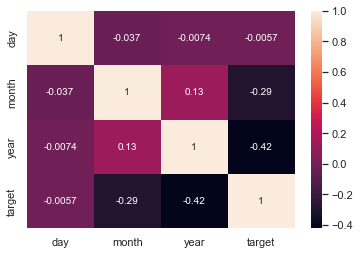

In [39]:
sns.heatmap(concat_df[['day', 'month', 'year', 'target']].corr(), annot = True)
sns.set(rc={'figure.figsize':(7,5)})

### Check links in text/ instead of text

In [40]:
# start with http, ? mean 0 or one s (https), ://, [^\n ]* any character except: '\n' (newline), ' ' (0 or more times)
pattern = r'https?://[^\n ]*'

# find how many samples have links in text
test_df = concat_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

text = f"{test_df.groupby('patterns')['text'].count()[1]} of {concat_df.shape[0]} samples have link"
print(colored(text, 'blue', attrs=['bold']))

1900 of 38637 samples have link


In [41]:
# remove link
concat_df['text'] = concat_df['text'].map(lambda x: re.sub(pattern, '', x))

In [42]:
# check how many strings had just link in text column
text = f"{concat_df.text[concat_df['text'].str.strip()==''].count()} samples had links instead of news text"
print(colored(text, 'blue', attrs=['bold']))

concat_df[concat_df['text'].str.strip()==''].sample(5)

48 samples had links instead of news text


,title,text,subject,target,day,month,year
11345,LIBERAL BIGOT Destroyed by Legendary Democrat ...,,politics,1,16,3,2017
11946,REP PETER KING: “Intel Community Carrying Out ...,,politics,1,14,12,2016
11299,SARA CARTER WAS RIGHT ABOUT SPYING ON TRUMP! “...,,politics,1,23,3,2017
11440,NEWT GINGRICH Punches Back At Democrats With M...,,politics,1,3,3,2017
11289,CRYBABY NANCY PELOSI Taunts Trump On Healthcar...,,politics,1,24,3,2017


In [43]:
# remove 48 samples without text
concat_df = concat_df[concat_df['text'].str.strip()!='']
concat_df.shape

(38589, 7)

### Plot unique alphabet characters in the text of samples with respect to text length and target 

In [44]:
# count unique alphabet characters in text of each sample
def unique_characters_number(string):
    lower_str = string.lower()
    alpha = re.sub(r'[^a-z]','',lower_str)
    unique_ch = set(list(alpha))
    n_unique_ch = len(unique_ch)
    return n_unique_ch

temp_df = concat_df[['text', 'target']].copy()
temp_df['unique_char'] = temp_df.text.map(lambda x: unique_characters_number(x))
temp_df.head(3)

,text,target,unique_char
0,Donald Trump just couldn t wish all Americans ...,1,25
1,House Intelligence Committee Chairman Devin Nu...,1,24
2,"On Friday, it was revealed that former Milwauk...",1,25


In [45]:
# sort in descending order by unique_char
to_plot = temp_df.sort_values(by='unique_char', ascending=False).reset_index()
# add length of text to dataframe
to_plot['text_len'] = to_plot.text.map(lambda x: len(x))
to_plot

,index,text,target,unique_char,text_len
0,9872,President Trump was right again! His campaign ...,1,26,2778
1,29326,- The Organization of American States (OAS) s...,0,26,3193
2,10111,Katie Couric s career has been pretty much in ...,1,26,1073
3,29340,"GWADAR, Pakistan - China is lavishing vast amo...",0,26,8620
4,17005,21st Century Wire says So much for caring abou...,1,26,3316
...,...,...,...,...,...
38584,11845,Via: WT,1,5,7
38585,12405,Via: GP,1,5,7
38586,11113,Enjoy:,1,5,6
38587,11890,Enjoy,1,5,5


<AxesSubplot:xlabel='text_len', ylabel='unique_char'>

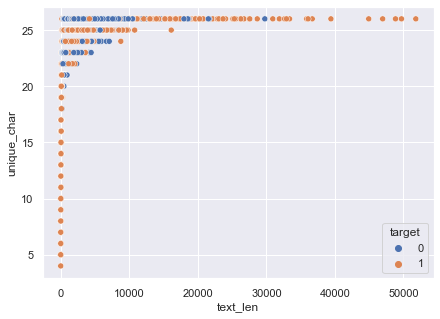

In [46]:
sns.scatterplot(data=to_plot, x='text_len', y='unique_char', hue='target')

In [47]:
# to_plot[(to_plot['unique_char']<20) & (to_plot['unique_char']>15)].sample(10)
text1 = f"{to_plot[to_plot['unique_char']<20].count()[0]} samples used less than 20 unique characters in text \n"
text2 = f"{to_plot.text_len[to_plot['unique_char']<20].max()} is max length of text with less than 20 unique characters \n"
text3 = f"{to_plot.text_len[to_plot['unique_char']>=20].mean().astype(int)} is average length of text with equeal or more than 20 unique characters"
print(colored(text1, 'blue', attrs=['bold']))
print(colored(text2, 'green', attrs=['bold']))
print(colored(text3, 'red', attrs=['bold']))

241 samples used less than 20 unique characters in text 

289 is max length of text with less than 20 unique characters 

2462 is average length of text with equeal or more than 20 unique characters


### Plot title

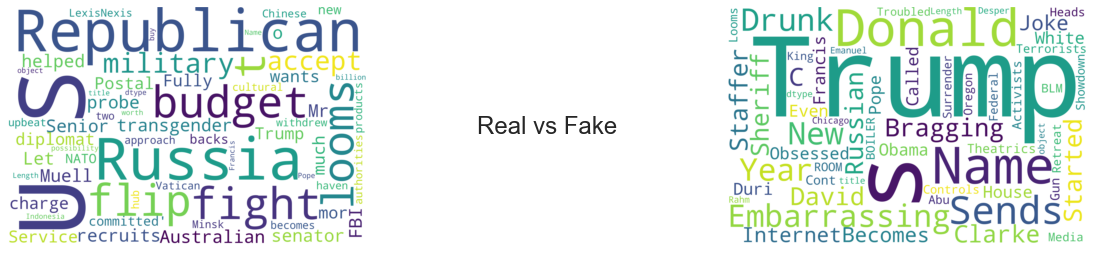

In [48]:
# plot title usin matplotlib and wordcloud

real_title = concat_df.title[concat_df['target']==0]
fake_title = concat_df.title[concat_df['target']==1]

def plot_fake_vs_real_news(real, fake):
    wordcloud_real = WordCloud(width = 3000, height = 2000, background_color = 'white',
                               stopwords = STOPWORDS).generate(str(real))
    wordcloud_fake = WordCloud(width = 3000, height = 2000, background_color = 'white',
                               stopwords = STOPWORDS).generate(str(fake))

    # plot the WordCloud image  
    plt.subplots(figsize=(15, 7))

    plt.subplot(1, 3, 1)
    plt.imshow(wordcloud_real, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    plt.subplot(1, 3, 3)
    plt.imshow(wordcloud_fake, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    plt.suptitle('Real vs Fake', y=0.5, va='center', size=24)
    
plot_fake_vs_real_news(real_title, fake_title)
plt.show()

### Plot text

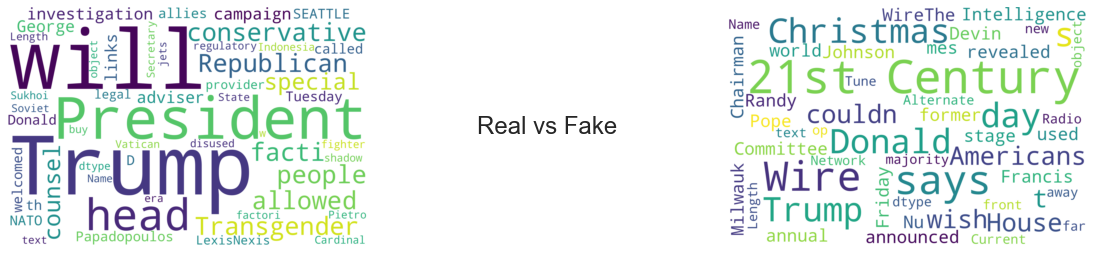

In [49]:
# plot text usin matplotlib and wordcloud

real_text = concat_df.text[concat_df['target']==0]
fake_text = concat_df.text[concat_df['target']==1]

plot_fake_vs_real_news(real_text, fake_text)
plt.show()

## Save cleaned dataset dropping redundant columns

In [50]:
final_df = concat_df[['text', 'target']].copy()
final_df.to_csv('eda_news_dataset.csv', index=False)
final_df.head()

,text,target
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
